In [1]:
!ln -s "/content/drive/My Drive/Estudos/unifor/Oitavo/Sistemas inteligentes/MLP/dados" /content/dados

In [2]:
import math
def binary_step(u):
    return 1 if x>=0 else 0
def sign_function(u):
    return 1 if u>=0 else -1
def sigmoid(u):
    return 1/(1+np.exp(-u))
def sigmoid_derivative(u):
    return 1 - sigmoid(u)
def TanH(u):
    return (1-math.e**(-2*u))/(1+math.e**(-2*u))
def TanHDerivative(u):
    return 1-TanH(u)
    #return 1 - ((1-math.e**(-2*u))/(1+math.e**(-2*u)))

In [3]:
import numpy as np
class MLP:

    def __init__(self,input_values,output_values,layers,learning_rate=1e-2,
                 precision=1e-6,activation_function=TanH,derivative_function=TanHDerivative):
       ones_column = np.ones((len(input_values), 1)) * -1
       self.input_values = np.append(ones_column, input_values, axis=1)
       
       self.output_values = output_values
       self.learning_rate = learning_rate
       self.precision = precision
       self.activation_function = activation_function
       self.derivative_function = derivative_function
       self.I = []
       self.Y = []
       self.W = []
       neuron_input = self.input_values.shape[1]
       for i in range(len(layers)):
            self.W.append(np.random.rand(layers[i], neuron_input))
            self.I.append(np.zeros(layers[i]))
            self.Y.append(np.zeros(layers[i]))
            neuron_input = layers[i] + 1
    
      
       self.epochs = 0
       self.eqms = []
    def run(self,x):
        y = self.propaga_total(np.append(-1,x))

        return [1 if 100*(y[0]/sum(y))>50 else 0,
               1 if 100*(y[1]/sum(y))>50 else 0,
               1 if 100*(y[2]/sum(y))>50 else 0]
    def train(self):
        print('iniciando treinamento')
        error = True
        eqm_actual = self.eqm()
        
        while error:
            error = False
            eqm_previous = eqm_actual
            # print(self.epochs)
            for x, d in zip(self.input_values,self.output_values):

                self.Y[-1] = self.propaga_total(x)
                self.retro_total(x,d)
                # self.retro_total()
                
            eqm_actual = self.eqm()
            self.eqms.append(eqm_actual)
            self.epochs+=1
            if abs(eqm_actual-eqm_previous)>self.precision:
                error=True
        print(self.epochs)
        return self.eqms 
    def propaga_camada(self,W,Y_anterior):
        i = np.dot(W, Y_anterior)
        Saida_atual = self.activation_function(i)
        return Saida_atual,i

    def propaga_total(self,x):
        Y=x.copy()
        for i,w in enumerate(self.W):
            Y,self.I[i] = self.propaga_camada(w,Y)
            if i <len(self.W)-1:
                Y = np.append(-1,Y)
            self.Y[i]=Y
        return self.Y[i]
        

    def retro_camada(self,w,w_old,y,d,u,x,out):
        if not out:
            y= y[1:]
            delta=sum(d*w_old)[1:]*self.derivative_function(u)
            delta=delta.reshape(len(delta),1)
        else:
            delta=((d-y)*self.derivative_function(u))
            delta=delta.reshape(len(delta),1)
            
        w += self.learning_rate*delta*x
        # d= np.dot(delta.T[0],w)

        return w,delta
    def retro_total(self,X,d):
        out=True
        w_old= 0
        for i,w in reversed(list(enumerate(self.W))):
            x=self.Y[i-1]
            if i == 0:
                x=X
            w,d = self.retro_camada(w,w_old,self.Y[i],d,self.I[i],x,out)
            out=False
            w_old = self.W[i]
    def eqm(self):
        eq = 0
        
        for x, d in zip(self.input_values, self.output_values):
            Y = self.propaga_total(x)
            eq += 0.5 * sum((d - Y) ** 2)
            
        return eq/len(self.output_values)


In [6]:
import pandas as pd
treino = pd.read_csv("dados/Trabalho Pratico - MLP - Classificação de Padrões - treinamento.csv")

In [7]:
treino.head()

,x1,x2,x3,x4,d1,d2,d3,Unnamed: 7
0,0.3841,0.2021,0.0000,0.2438,1,0,0,NaN
1,0.1765,0.1613,0.3401,0.0843,1,0,0,NaN
2,0.3170,0.5786,0.3387,0.4192,0,1,0,NaN
3,0.2467,0.0337,0.2699,0.3454,1,0,0,NaN
4,0.6102,0.8192,0.4679,0.4762,0,1,0,NaN


In [8]:
X = treino[["x1","x2","x3","x4"]].values
Y = treino[["d1","d2","d3"]].values

In [9]:
teste = pd.read_csv("dados/Trabalho Pratico - MLP - Classificação de Padrões - teste.csv")
teste.drop("Unnamed: 7",axis=1, inplace=True)

In [10]:
teste.head()

,x1,x2,x3,x4,d1,d2,d3
0,0.8622,0.7101,0.6236,0.7894,0,0,1
1,0.2741,0.1552,0.1333,0.1516,1,0,0
2,0.6772,0.8516,0.6543,0.7573,0,0,1
3,0.2178,0.5039,0.6415,0.5039,0,1,0
4,0.7260,0.7500,0.7007,0.4953,0,0,1


In [17]:
xt=teste[["x1","x2","x3","x4"]].values
yt=teste[["d1","d2","d3"]].values


iniciando treinamento
1391


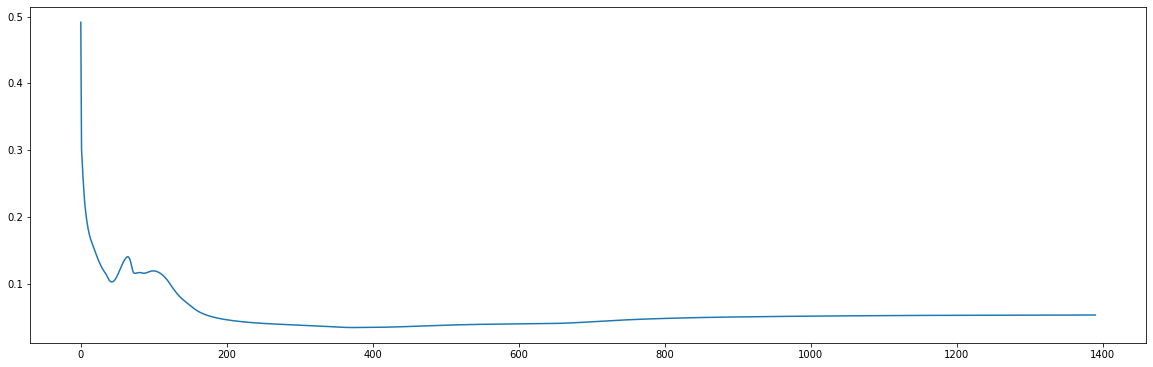

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,21))
plt.title("Eqm por epoca")

rede = MLP(X,Y,[15,3],learning_rate=0.1,precision=1e-6,activation_function=sigmoid,derivative_function=sigmoid_derivative)
Resultado =teste
for i in range(1):
    Eqms = rede.train()
    plt.subplot(3,1,i+1)
    plt.plot(Eqms)

    respostas=[]
    for j in xt:
        respostas.append(rede.run(j))

    resultado_parcial=pd.DataFrame(data=respostas,columns=[f'T{i+1},1',f'T{i+1},2',f'T{i+1},3'])
    Resultado= pd.concat([Resultado,resultado_parcial],axis=1)
plt.show()

In [19]:
Resultado

,x1,x2,x3,x4,d1,d2,d3,"T1,1","T1,2","T1,3"
0,0.8622,0.7101,0.6236,0.7894,0,0,1,0,0,1
1,0.2741,0.1552,0.1333,0.1516,1,0,0,1,0,0
2,0.6772,0.8516,0.6543,0.7573,0,0,1,0,0,1
3,0.2178,0.5039,0.6415,0.5039,0,1,0,0,1,0
4,0.7260,0.7500,0.7007,0.4953,0,0,1,0,0,1
5,0.2473,0.2941,0.4248,0.3087,1,0,0,1,0,0
6,0.5682,0.5683,0.5054,0.4426,0,1,0,0,1,0
7,0.6566,0.6715,0.4952,0.3951,0,1,0,0,1,0
8,0.0705,0.4717,0.2921,0.2954,1,0,0,1,0,0
9,0.1187,0.2568,0.3140,0.3037,1,0,0,1,0,0


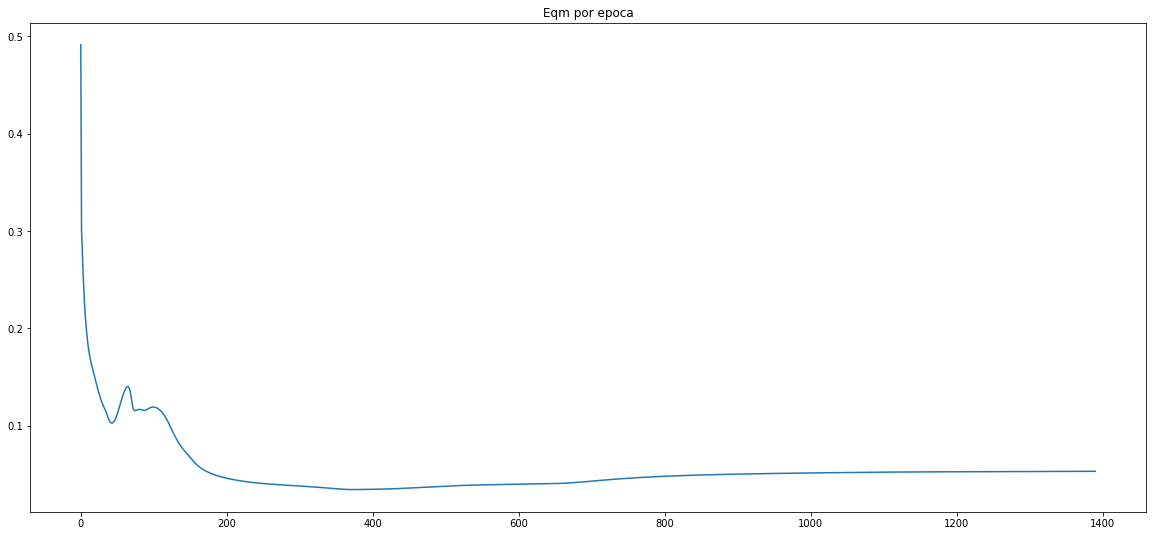

In [20]:
plt.figure(figsize=(20,9))
plt.title("Eqm por epoca")
plt.plot(Eqms)
plt.show()